In [1]:
import numpy as np
import sys
sys.path.insert(1,'../../src')
from _generate_time_series import *
from _shear_frame import *
from utils_OB import *
from _clustering import *

%load_ext autoreload
%autoreload 2

#### Setting up the initial system:

#### Specify the development with time

In [2]:
n=10  #number of time series to run

#shapes for how the stiffnesses should behave trougout the time series:
shapey=np.sin(np.linspace(1.3,np.pi/2+0.2,n))
shapex=np.hstack((np.ones(n//2),np.linspace(1,3,n//2)))

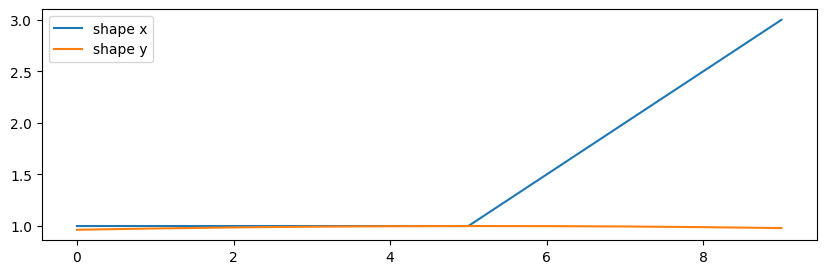

In [4]:
# stiffness and mass: 
kx=np.array([2,2])*4000
ky=np.array([2,2])*4000
m=np.array([1,1])*500

fig=plt.figure(figsize=(10,3))
plt.plot(np.arange(0,n,1),shapex,label='shape x')
plt.plot(np.arange(0,n,1),shapey, label='shape y')
plt.legend()
plt.show()

#### Defining the time series and modal orders

In [5]:
#What modal orders to run in the cov-ssi:
orders=np.arange(2,20,1)

#sampling frequency and lengt of each time series:
fs=7        #Hz
T_max=3000  #sec
t=np.arange(0,T_max,1/fs)

#### Specifing the load
        If none of [next_segment,next_DOF,harmonic,harmonic_part] is 
        specified the same white noise loading are used for all
        DOFs, for all the time series.  
        
        next_segment: 'new' or'same'
                whether or not to creata a new set of loads 
                for each time segment
                
        next_DOF: 'new','same' or 'random'
                whether or not to create a new set of loading for each
                DOF. 'same' uses the same load series, new creates a new
                series with same parameters, randaom creates random params.
                as well.
        white_noise_amp: float
                the relative amplitude of the white noise 

        harmonic: string or None
            'random' crates a random freq. in the interval [0.5w_0,2w_n] w 
            are natural frqs of the frame.
            'decreasing' creates a decreasing frequenzy from [w_n , w_0]

        harmonic_part: float
            the harmonic amplitude in relation to the white noise. 0.5
            gives 50% of the amplitude.

In [6]:
# specify parameters for the load series: 
    # the general input for the amplutide of the white noise
white_noise_amp=1
    # whether or not to create new load series for each time segment
next_segment='new'
    #whether or not to greate indeviduel loadings for all DOFS
next_DOF='new'
    #Whether or not to include a harmonic part in the loading, and what type of 
    #harmonic function
harmonic=None
    #the the factor the amplitude of the harmonic is multiplied with 
    #the amplitude of the white noise
harmonic_part=0

### Noise fac for added measurments noice: 
noise_fac=0

## Generating the time series

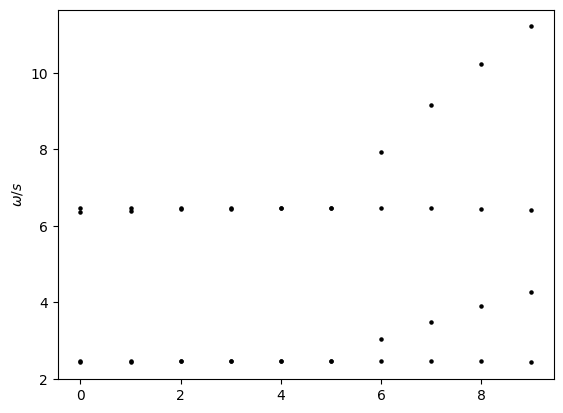

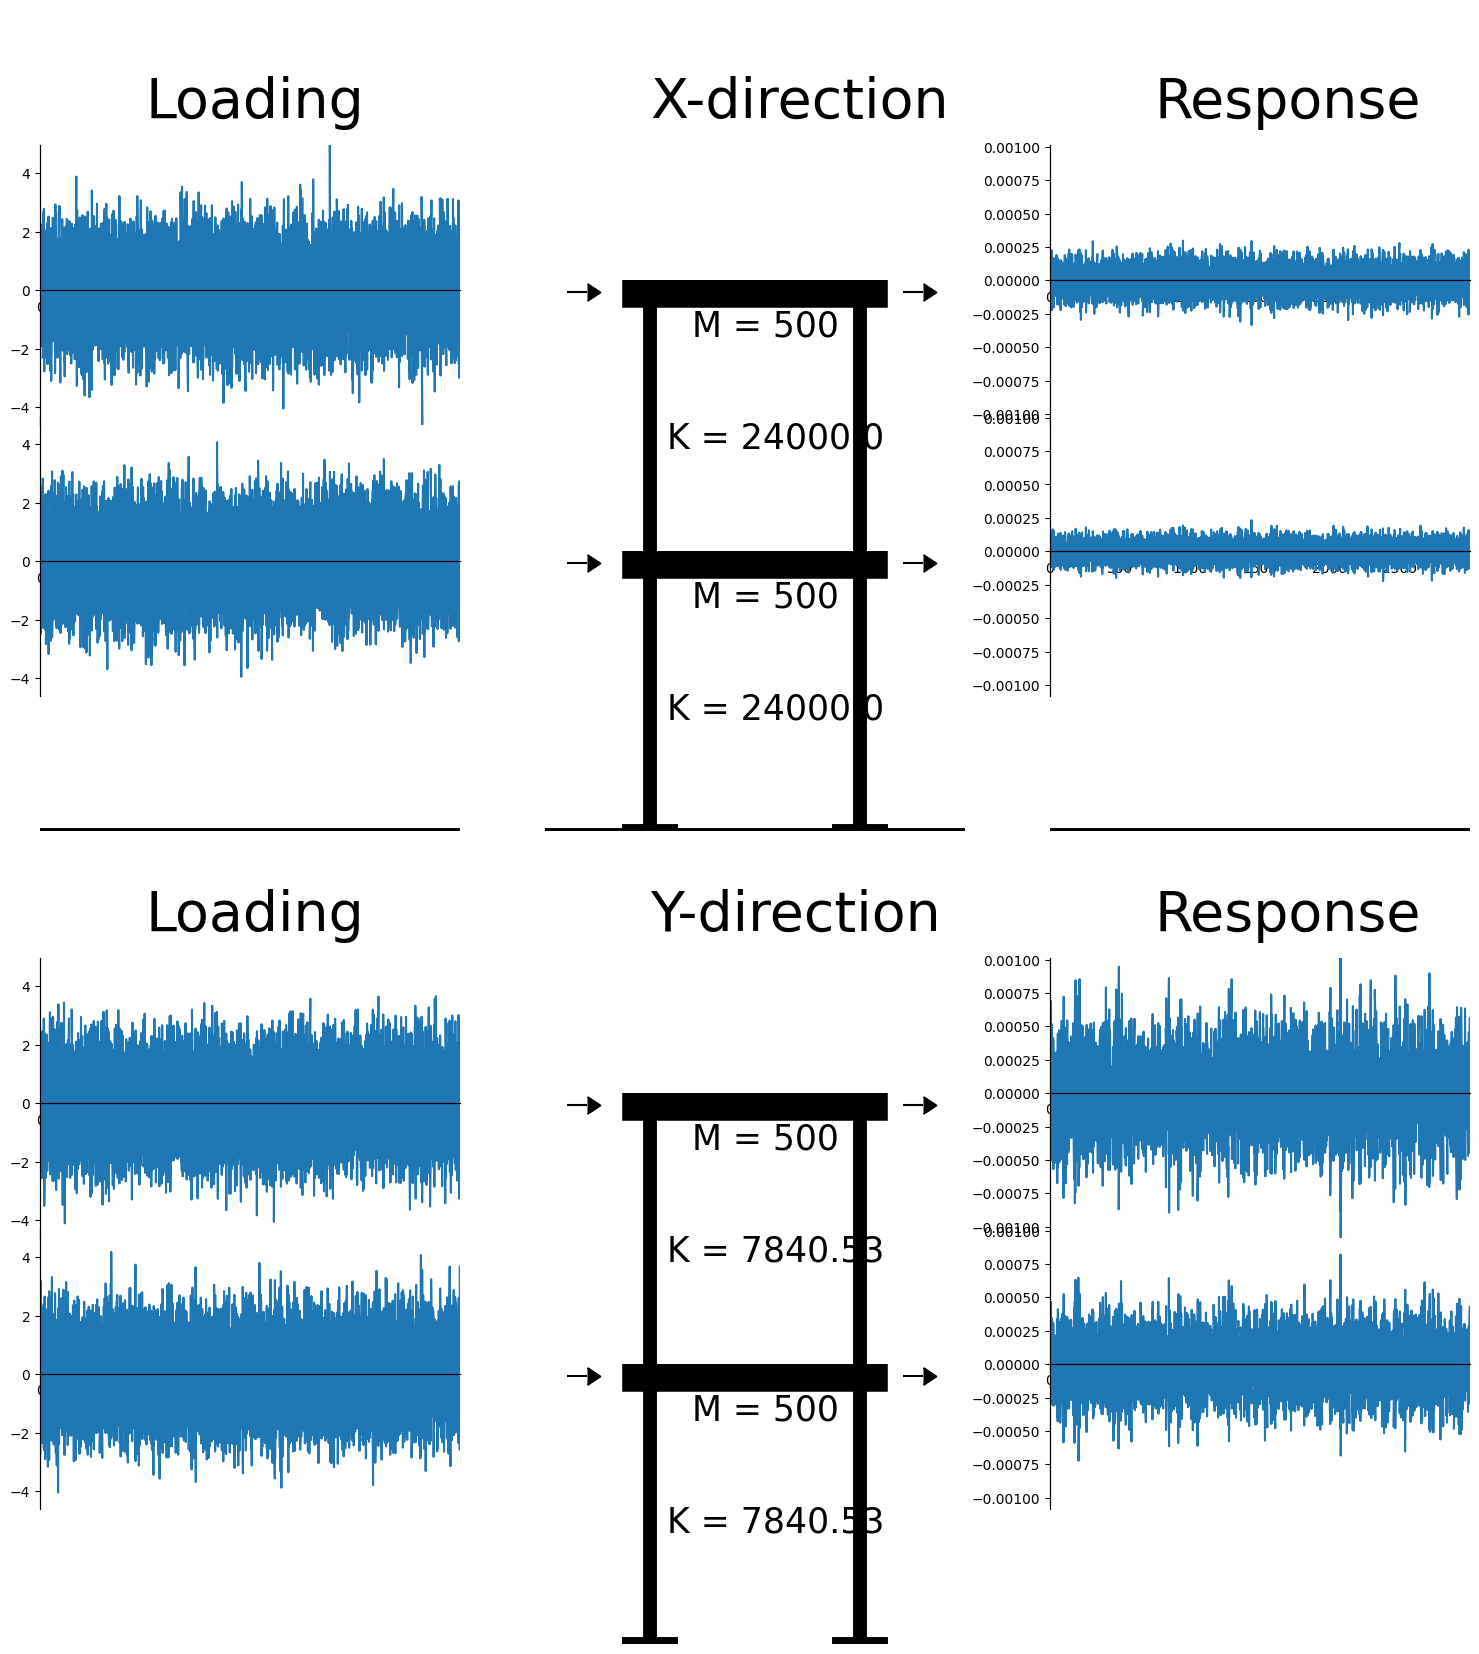

In [7]:
true_w,_,responses=generate_dynamic_series(kx,ky,shapex,shapey,m,t,
                                           white_noise_amp=white_noise_amp
                                           ,next_segment=next_segment
                                           ,next_DOF=next_DOF
                                           ,harmonic=harmonic
                                           ,harmonic_part=harmonic_part
                                           ,plot=True)

#### Running cov-ssi:

In [8]:
lambds,phis=create_input_COVssi(responses,t,orders)

In [17]:
print(len(phis[1]))

18


#### Plotting each time segment as a column

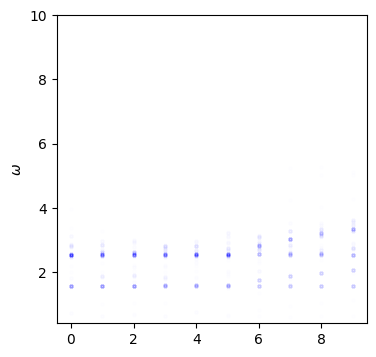

In [9]:
matplotlib.use('module://matplotlib_inline.backend_inline') #setting backend in case cells are not run in appropriate order
ys=create_output_guassian(lambds)

til_jon=ys.T

plt.figure(figsize=(4,4))
for k,s in enumerate(ys): 
    plt.scatter(s*0+k,s,s=6,alpha=0.005,color='blue')
plt.ylim(0.4,10)
plt.ylabel(r"$\omega$")
plt.show()

# plt.figure(figsize=(10,10))
# for k,s in enumerate(ys): 
#     plt.scatter(s*0+k,s,s=6,alpha=0.02,color='blue')
#     plt.scatter(true_w[k]*0+k,true_w[k],color='black',marker=1)
# plt.ylim(0.4,3.6)

#### Setting the parameters for the clustering

In [10]:
valid_range= { 'freq': [1e-4, np.inf],'damping': [1e-4,np.inf] }

indicator='freq'
s=3
stabcrit = {'freq':0.05, 'damping': 0.1, 'mac': 0.1}
prob_threshold = 0.9   #probability of pole to belong to 
# cluster, based on estimated "probability" density function

min_cluster_size=3 
min_samples=4
scaling={'mac':1.0, 'lambda_real':1.0, 'lambda_imag': 1.0}


#### Clustering: 

In [11]:
phis_out,lambds_out=clustering(lambds,
phis,orders,s,stabcrit,valid_range,indicator,prob_threshold,
scaling,min_cluster_size,min_samples,true_w=true_w,plot=False)

In [12]:
# for i in range(len(phis_out)):
#     print(phis_out[i][0])
print(phis_out[0][0])

[[0.0403697 -0.05305217j 0.0342956 -0.05910767j 0.03490957-0.06311818j
  0.03667613-0.0643317j ]
 [0.06154105-0.08072166j 0.05355679-0.09261728j 0.05611781-0.09859404j
  0.05692681-0.10055316j]
 [0.61945442+0.00076459j 0.61936744+0.00216793j 0.62131529+0.00275037j
  0.62177714+0.00300015j]
 [0.99999192+0.00401981j 0.99999219+0.0039534j  0.99999041+0.0043787j
  0.99998691+0.00511745j]]


#### Plotting the output, aka the test case:

<__array_function__ internals>:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
C:\Users\olebj\AppData\Local\Temp\ipykernel_6120\1739680293.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.abs(lambd_i)**0.5/2/np.pi,color='black',s=2)


ValueError: setting an array element with a sequence.

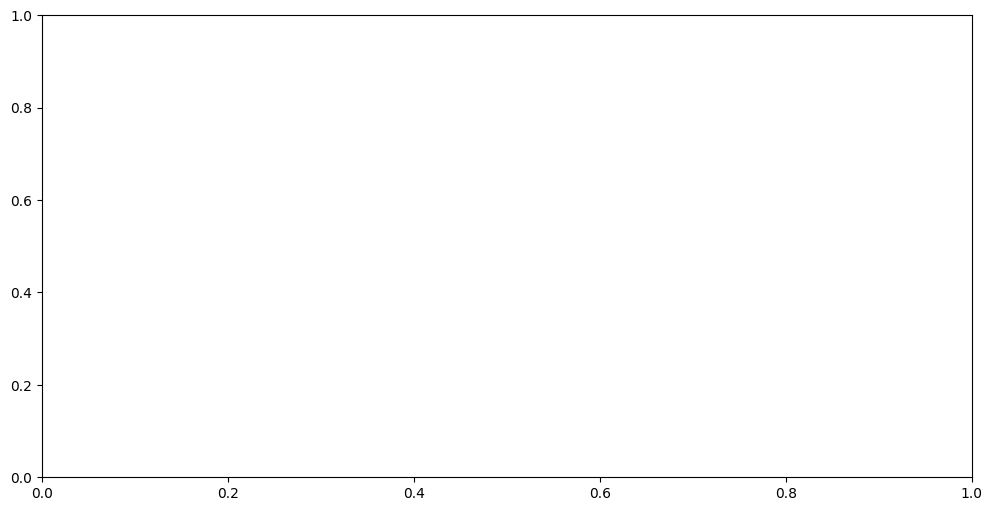

In [13]:
matplotlib.use('module://matplotlib_inline.backend_inline') #setting backend in case cells are not run in appropriate order
stat=[]
fig,ax =plt.subplots(figsize=(12,6))
for segment_number,lambd_i in enumerate(lambds_out):
    stat.append(len(lambd_i))
    ax.scatter(np.ones_like(lambd_i)*segment_number,
               np.abs(lambd_i)**0.5/2/np.pi,color='black',s=2)
    ax.set_title('poles left atfer clustering')
    ax.set_xlabel('Segment number')
    ax.set_ylabel('Frequency [Hz]')
plt.show()
plt.plot(range(len(stat)),stat)
plt.ylim(0,6)

In [ ]:
np.savez('test_1',np.array(lambds_out,dtype=object),
         np.array(phis_out,dtype=object))